## Training SVM classifier on DD_ACC dataset

The first step is to read dataset from CSV file

In [49]:
import pandas as pd
from sklearn import preprocessing


#dd_dataset = pd.read_csv('./dataset/dd_pssm_dataset_improved.csv')
# Add separated dimers feature extraction

dd_dataset = pd.read_csv('../dataset/dd_ACC_dataset_IG.csv')

In [50]:
dd_dataset.head()

,Fold,Protein name,F977,F912,F1166,F647,F793,F708,F996,F898,...,F790,F1340,F1540,F1169,F305,F1507,F1299,F1155,F386,F1221
0,Globm-like(alpha),2LHB,-0.399737,0.405657,0.485693,-0.093024,0.072585,-0.720872,0.707496,0.320963,...,1.062513,-0.168908,0.988832,0.606575,0.005033,1.804784e-01,-0.483699,0.005991,3.151907e-01,-3.097699e-01
1,Globm-like(alpha),3SDHA,-0.137876,-0.107061,-0.345996,0.175331,-0.437490,0.396697,-0.214693,0.708716,...,0.594735,-0.151556,0.353050,-0.111828,0.003111,-5.939943e-02,-0.403252,-0.172528,-4.417598e-02,2.201761e-01
2,Globm-like(alpha),1FLP,-0.025017,-0.146573,-0.098038,-0.095989,-0.101436,-0.250592,-0.143614,-0.117110,...,-0.025293,0.195421,-0.116406,0.047839,0.176857,-2.134016e-02,0.112846,0.190956,-1.051678e-02,-5.154598e-02
3,Globm-like(alpha),2HBG,0.139929,0.009713,0.009357,-0.056709,-0.227964,-0.093643,-0.175371,0.252061,...,0.477308,0.370757,0.188255,-0.461226,-0.014985,-2.483331e-02,-0.086637,-0.026254,-5.159578e-03,-6.422533e-02
4,Globm-like(alpha),2MGE,-0.574369,0.316517,0.304017,0.476801,-0.527676,0.360491,1.439641,-0.497493,...,1.006694,-0.669374,-0.001340,-0.533603,-0.065659,1.346238e-16,-0.283534,-0.047445,4.457609e-17,3.963891e-16


Convert class lables to unique integers

In [51]:
# Encode class labels
#from sklearn.preprocessing import LabelEncoder

y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)

In [52]:
dd_dataset.head()

,Fold,class labels,Protein name,F977,F912,F1166,F647,F793,F708,F996,...,F790,F1340,F1540,F1169,F305,F1507,F1299,F1155,F386,F1221
0,Globm-like(alpha),0,2LHB,-0.399737,0.405657,0.485693,-0.093024,0.072585,-0.720872,0.707496,...,1.062513,-0.168908,0.988832,0.606575,0.005033,1.804784e-01,-0.483699,0.005991,3.151907e-01,-3.097699e-01
1,Globm-like(alpha),0,3SDHA,-0.137876,-0.107061,-0.345996,0.175331,-0.437490,0.396697,-0.214693,...,0.594735,-0.151556,0.353050,-0.111828,0.003111,-5.939943e-02,-0.403252,-0.172528,-4.417598e-02,2.201761e-01
2,Globm-like(alpha),0,1FLP,-0.025017,-0.146573,-0.098038,-0.095989,-0.101436,-0.250592,-0.143614,...,-0.025293,0.195421,-0.116406,0.047839,0.176857,-2.134016e-02,0.112846,0.190956,-1.051678e-02,-5.154598e-02
3,Globm-like(alpha),0,2HBG,0.139929,0.009713,0.009357,-0.056709,-0.227964,-0.093643,-0.175371,...,0.477308,0.370757,0.188255,-0.461226,-0.014985,-2.483331e-02,-0.086637,-0.026254,-5.159578e-03,-6.422533e-02
4,Globm-like(alpha),0,2MGE,-0.574369,0.316517,0.304017,0.476801,-0.527676,0.360491,1.439641,...,1.006694,-0.669374,-0.001340,-0.533603,-0.065659,1.346238e-16,-0.283534,-0.047445,4.457609e-17,3.963891e-16


Create a training set from pandas data frame

In [53]:
train_data = dd_dataset.iloc[:,3:].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 311, Number of features: 500


In [54]:
# Show normlaized data

train = pd.DataFrame(train_data)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.259159,0.575966,0.563149,0.467414,0.484902,0.143481,0.693966,0.435396,0.543338,0.348305,...,0.762921,0.349028,0.697582,0.539319,0.338390,0.407979,0.208221,0.459416,0.500133,0.215216
1,0.342424,0.414306,0.303531,0.570877,0.331796,0.544585,0.410079,0.535519,0.529921,0.007575,...,0.601383,0.353459,0.539792,0.362631,0.337849,0.331345,0.232597,0.384014,0.394994,0.367936
2,0.378311,0.401848,0.380933,0.466271,0.432667,0.312268,0.431960,0.322280,0.376448,0.398974,...,0.387269,0.442076,0.423282,0.401901,0.386746,0.343504,0.388979,0.537541,0.404841,0.289631
3,0.430759,0.451125,0.414457,0.481415,0.394688,0.368598,0.422184,0.417605,0.387447,0.484352,...,0.560832,0.486857,0.498893,0.276699,0.332756,0.342388,0.328534,0.445797,0.406409,0.285977
4,0.203631,0.547860,0.506437,0.687109,0.304725,0.531591,0.919349,0.224060,0.370848,0.395755,...,0.743645,0.221210,0.451839,0.258898,0.318495,0.350321,0.268873,0.436846,0.407918,0.304485


## Data analysis

In [7]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')
plt.show()

<Figure size 640x480 with 1 Axes>

## SVM classifier

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

Define range of parameters for Grid Search

In [56]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-14, 14)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-14, 14)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = -1 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [57]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


C:\Users\Mir\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 7192 t

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0], 'gamma': [6.103515625e-05, 0.0...25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best results

In [58]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 22.83


Confusion matrix

Accuracy:  90.9967845659164


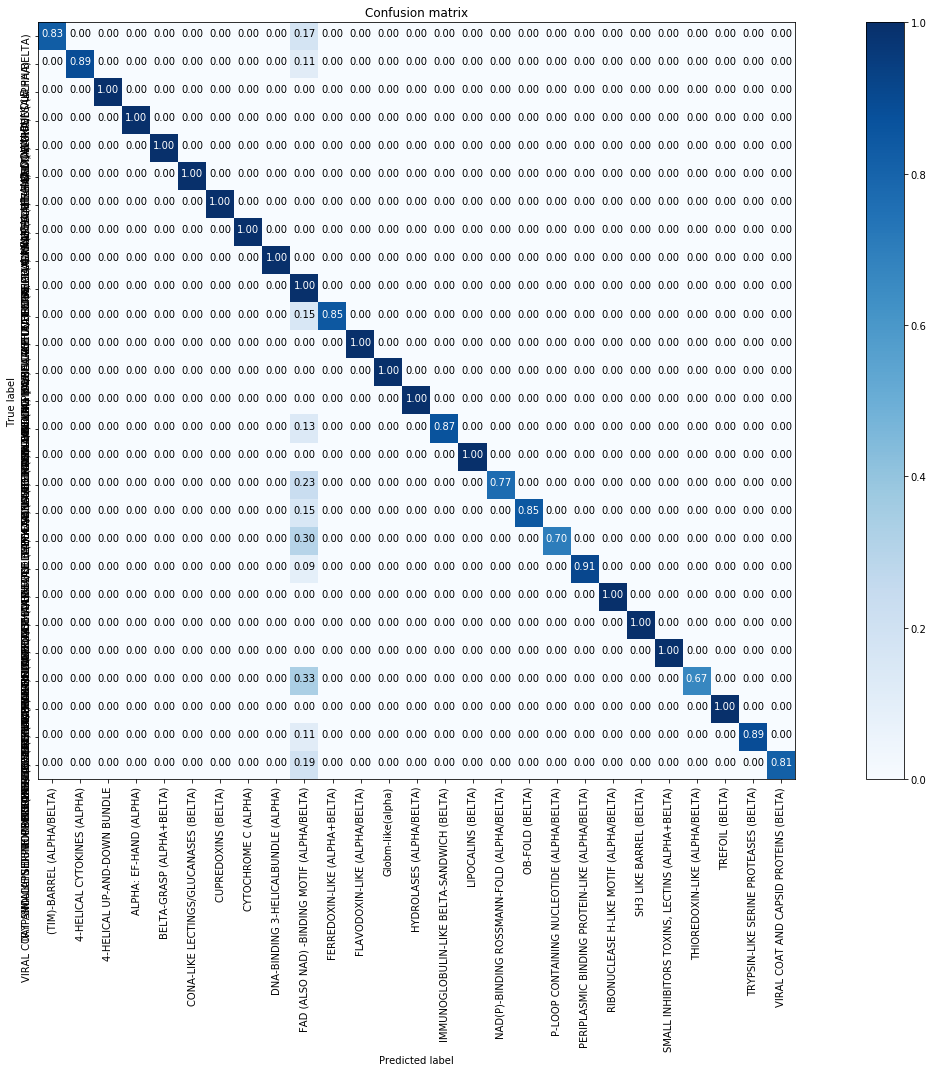

In [59]:
import sys
sys.path.insert(0, 'E:\\Mir\\Projects\\bio-protein-recog\\src')


from misc import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("../report/DD_IG_ACC_confusion_matrix.png", dpi=256)

Classification report

In [61]:
print(classification_report(labels[y_true], labels[y_pred]))

                                                precision    recall  f1-score   support

                    (TIM)-BARREL (ALPHA/BELTA)       1.00      0.83      0.91        29
                   4-HELICAL CYTOKINES (ALPHA)       1.00      0.89      0.94         9
                  4-HELICAL UP-AND-DOWN BUNDLE       1.00      1.00      1.00         7
                        ALPHA: EF-HAND (ALPHA)       1.00      1.00      1.00         6
                     BELTA-GRASP (ALPHA+BELTA)       1.00      1.00      1.00         7
         CONA-LIKE LECTINGS/GLUCANASES (BELTA)       1.00      1.00      1.00         7
                           CUPREDOXINS (BELTA)       1.00      1.00      1.00         9
                          CYTOCHROME C (ALPHA)       1.00      1.00      1.00         7
           DNA-BINDING 3-HELICALBUNDLE (ALPHA)       1.00      1.00      1.00        12
   FAD (ALSO NAD) -BINDING MOTIF (ALPHA/BELTA)       0.28      1.00      0.44        11
                 FERREDOXIN-LIK

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create Dmatrix for more performance 
data_matrix = xgb.DMatrix(data=train_data,label=labels)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=123)

In [ ]:
# Instantitate an XGBosst Classifier
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)


In [ ]:
# Fit the classifier to the training set
xg_clf.fit(X_train,y_train)

# Predit test data
preds = xg_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)

In [ ]:
print("Best accuracy: %.2f" % (accuracy*100))
